### Video games sales prediction - hackathon - 21st September 2024

In [5]:
import os

In [7]:
# get the folder path - working directory
os.getcwd()

'C:\\Users\\raviksa\\Documents\\Inceptez 23\\Practical'

In [13]:
# change the folder to access the sample files - data set
os.chdir(r"C:\Users\raviksa\Documents\Inceptez 23\sample_data")

In [15]:
ls

 Volume in drive C is OSDisk
 Volume Serial Number is A444-A0A3

 Directory of C:\Users\raviksa\Documents\Inceptez 23\sample_data

09/21/2024  09:21 AM    <DIR>          .
09/21/2024  09:21 AM    <DIR>          ..
07/21/2024  08:50 AM         3,839,955 adult.csv
07/21/2024  10:41 AM            25,005 Auto.csv
08/11/2024  11:55 AM            40,774 bathroom_bedroom_size_price_scatter.jpg
08/31/2024  12:24 PM    <DIR>          Big Mart Sales Prediction - Hackathon 1
01/01/1980  12:00 AM            12,288 database.db
06/30/2024  09:12 AM    <DIR>          data-for-datavis
08/11/2024  09:32 AM           517,482 housing_prices_dataset.csv
01/01/1980  12:00 AM           309,767 IMDB-Movie-Data.csv
01/01/1980  12:00 AM                79 new_csv.csv
01/01/1980  12:00 AM               102 purchases (1).json
07/03/2024  08:28 PM               102 purchases (2).json
01/01/1980  12:00 AM                76 purchases.csv
01/01/1980  12:00 AM               102 purchases.json
08/11/2024  11:50 AM     

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.preprocessing import PolynomialFeatures

import joblib

In [34]:
# Laod the dataset
df = pd.read_csv('video games sales prediction.csv')

In [36]:
df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [38]:
# find the rows and columns of the dataset
df.shape

(3506, 9)

In [40]:
df.columns

Index(['ID', 'CONSOLE', 'YEAR', 'CATEGORY', 'PUBLISHER', 'RATING',
       'CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3506 non-null   int64  
 1   CONSOLE          3506 non-null   object 
 2   YEAR             3506 non-null   int64  
 3   CATEGORY         3506 non-null   object 
 4   PUBLISHER        3506 non-null   object 
 5   RATING           3506 non-null   object 
 6   CRITICS_POINTS   3506 non-null   float64
 7   USER_POINTS      3506 non-null   float64
 8   SalesInMillions  3506 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 246.6+ KB


In [46]:
# It will show unique count of values in each columns of the dataset
df.nunique()

ID                 2654
CONSOLE              17
YEAR                 23
CATEGORY             12
PUBLISHER           204
RATING                6
CRITICS_POINTS     1683
USER_POINTS        2182
SalesInMillions    3506
dtype: int64

In [414]:
df.columns

Index(['ID', 'CONSOLE', 'YEAR', 'CATEGORY', 'PUBLISHER', 'RATING',
       'CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions'],
      dtype='object')

<Axes: xlabel='count', ylabel='CONSOLE'>

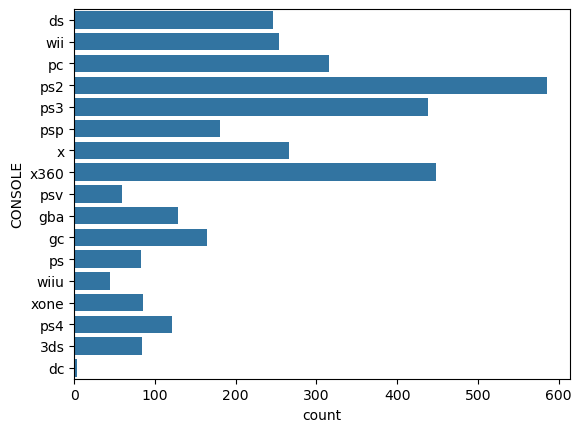

In [48]:
sns.countplot(data = df, y = df['CONSOLE'])

<Axes: xlabel='CONSOLE', ylabel='count'>

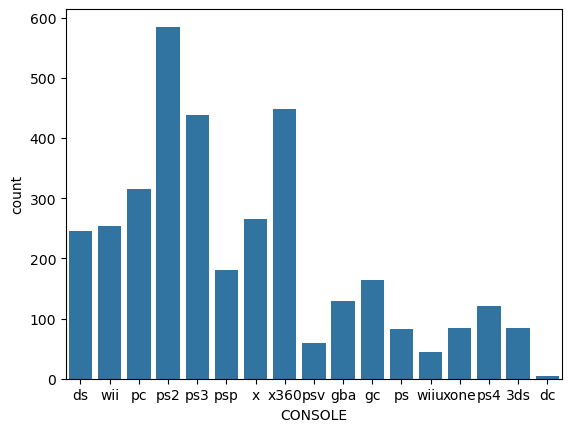

In [50]:
sns.countplot(data = df, x = 'CONSOLE')

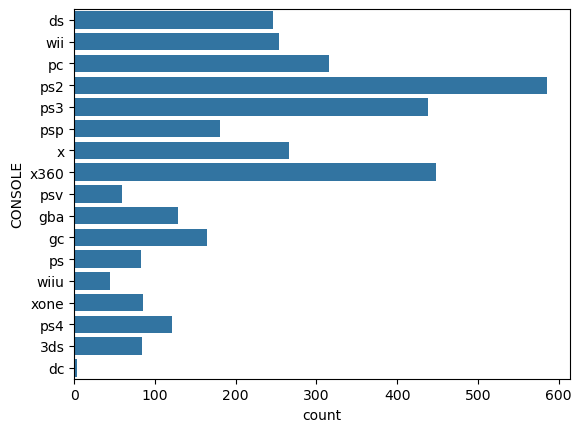

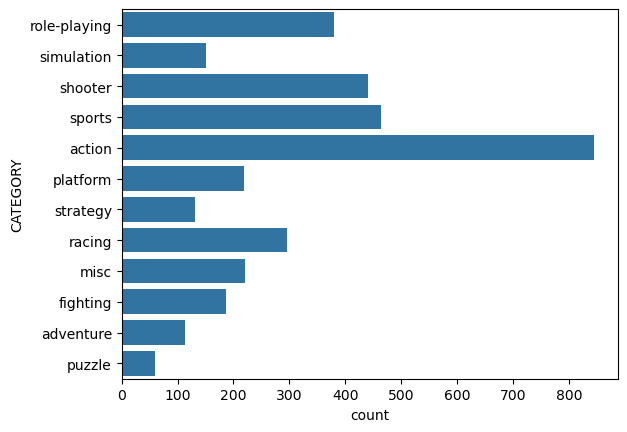

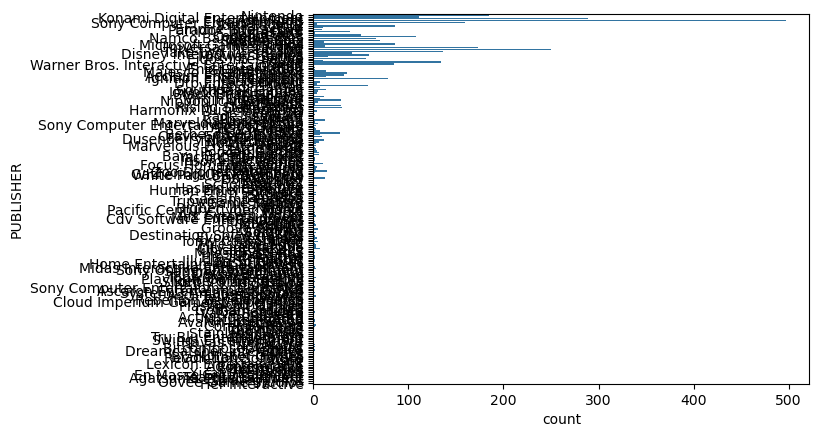

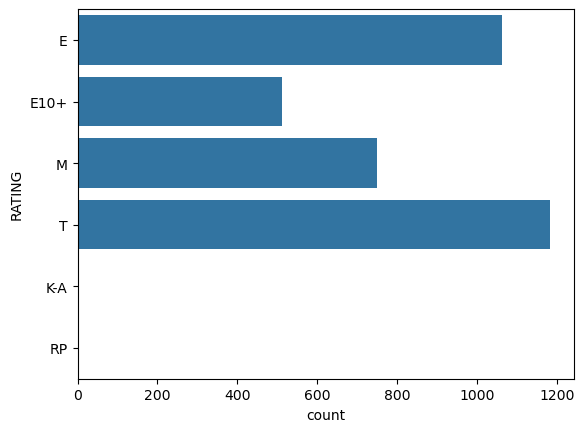

In [96]:
# plot the graph of counts for all the column values with object as data type

for col in df.select_dtypes(include='object').columns:
    sns.countplot(data=df,y=col)
    plt.show()
 

In [86]:
!python --version

Python 3.11.7


In [106]:
df['CONSOLE'].value_counts()

CONSOLE
ps2     585
x360    448
ps3     438
pc      315
x       266
wii     254
ds      246
psp     180
gc      164
gba     129
ps4     121
xone     85
3ds      84
ps       83
psv      59
wiiu     45
dc        4
Name: count, dtype: int64

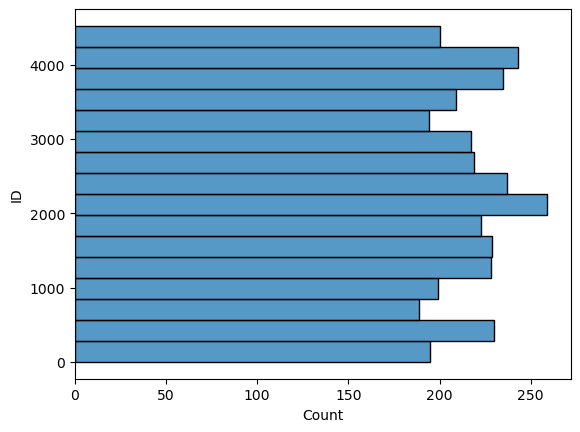

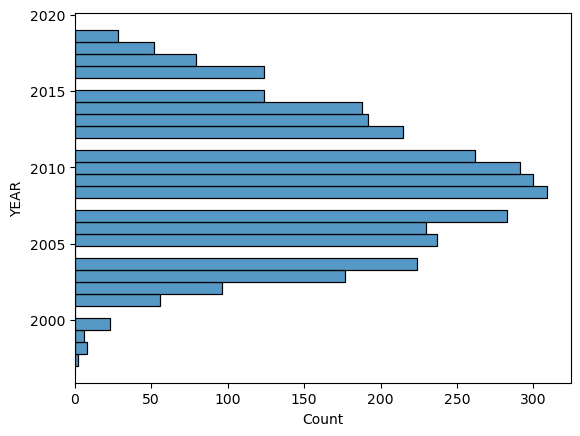

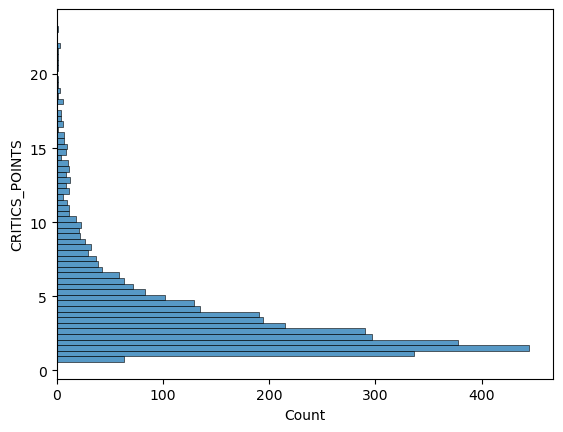

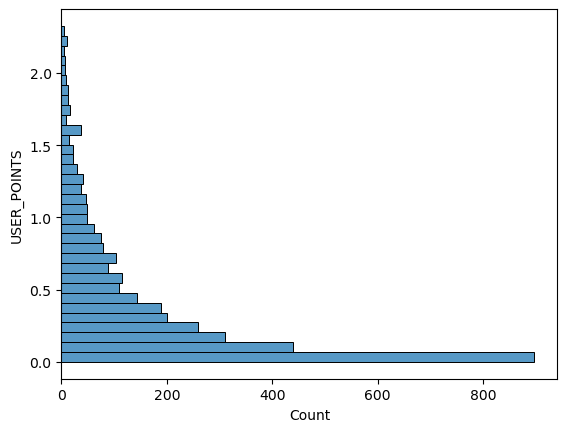

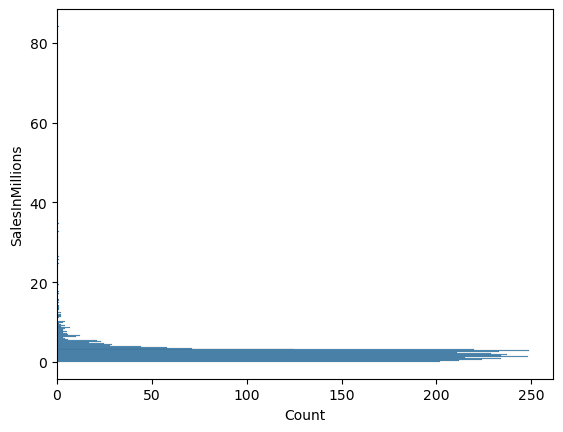

In [100]:
# plot the graph of counts for all the column values with integer and float as data type

for col in df.select_dtypes(exclude='object').columns:
    sns.histplot(data=df,y=col)
    plt.show()

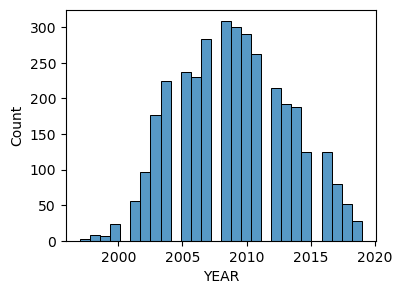

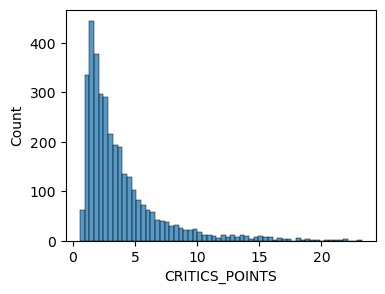

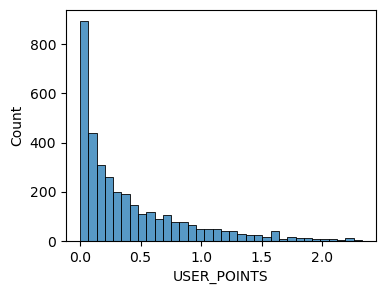

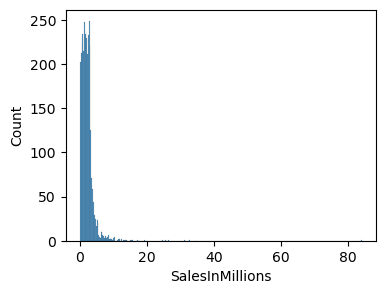

In [110]:
# plot the graph of counts for all the column values with integer and float as data type except ID column in the dataset

for col in df.drop(columns=['ID']).select_dtypes(exclude='object').columns:
    plt.figure(figsize=(4,3))
    sns.histplot(data=df,x=col)
    plt.show()

In [132]:
df['YEAR'].value_counts().sort_index()

YEAR
1997      2
1998      8
1999      6
2000     23
2001     56
2002     96
2003    177
2004    224
2005    237
2006    230
2007    283
2008    309
2009    300
2010    291
2011    262
2012    215
2013    192
2014    188
2015    124
2016    124
2017     79
2018     52
2019     28
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='Count'>

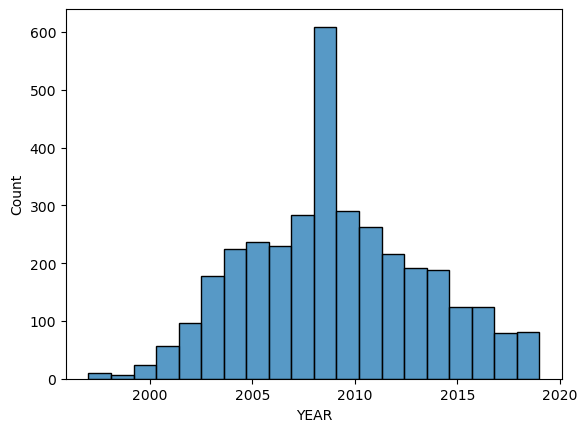

In [134]:
sns.histplot(data=df,x='YEAR', bins=20)

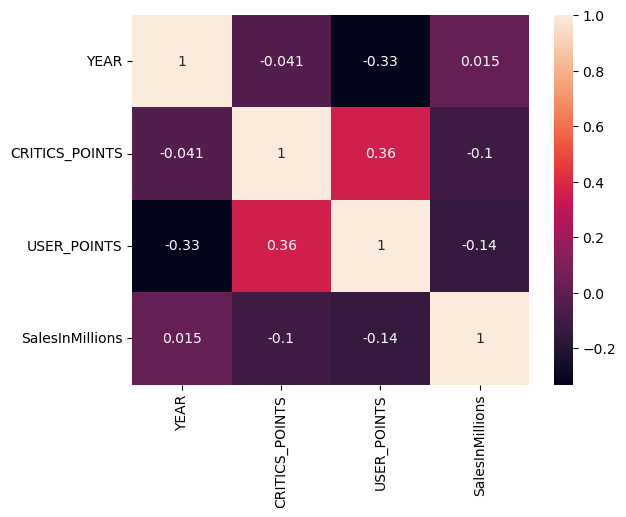

In [142]:
#find the correlation of data

sns.heatmap(df.drop(columns=['ID']).select_dtypes(exclude='object').corr(),annot=True)
plt.show()

In [146]:
df.select_dtypes(exclude='object').corr()

,ID,YEAR,CRITICS_POINTS,USER_POINTS,SalesInMillions
ID,1.000000,-0.053616,-0.005240,0.025612,-0.021986
YEAR,-0.053616,1.000000,-0.040943,-0.330024,0.015476
CRITICS_POINTS,-0.005240,-0.040943,1.000000,0.357396,-0.102378
USER_POINTS,0.025612,-0.330024,0.357396,1.000000,-0.140307
SalesInMillions,-0.021986,0.015476,-0.102378,-0.140307,1.000000


In [156]:
target_col = 'SalesInMillions'
target_col

'SalesInMillions'

In [158]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['CONSOLE', 'CATEGORY', 'PUBLISHER', 'RATING'], dtype='object')

In [160]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols

Index(['ID', 'YEAR', 'CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions'], dtype='object')

In [162]:
ignore_cols = 'ID'
ignore_cols

'ID'

In [164]:
num_cols = df.drop(columns=ignore_cols).select_dtypes(exclude='object').columns
num_cols

Index(['YEAR', 'CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions'], dtype='object')

#### Pre-processing

In [169]:
df.nunique()

ID                 2654
CONSOLE              17
YEAR                 23
CATEGORY             12
PUBLISHER           204
RATING                6
CRITICS_POINTS     1683
USER_POINTS        2182
SalesInMillions    3506
dtype: int64

In [171]:
df.columns

Index(['ID', 'CONSOLE', 'YEAR', 'CATEGORY', 'PUBLISHER', 'RATING',
       'CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions'],
      dtype='object')

In [179]:
# print the unique values from each column values
for col in df.columns:
    print(col, df[col].nunique())
    ulen=df[col].nunique()
    print(col, ' = ', df[col].unique())

ID 2654
ID  =  [2860  731  495 ... 2862 3065 3722]
CONSOLE 17
CONSOLE  =  ['ds' 'wii' 'pc' 'ps2' 'ps3' 'psp' 'x' 'x360' 'psv' 'gba' 'gc' 'ps' 'wiiu'
 'xone' 'ps4' '3ds' 'dc']
YEAR 23
YEAR  =  [2008 2012 2019 2002 2013 2004 2014 2016 2010 2006 2007 2011 2003 2001
 2015 2009 2000 2005 2017 1999 2018 1998 1997]
CATEGORY 12
CATEGORY  =  ['role-playing' 'simulation' 'shooter' 'sports' 'action' 'platform'
 'strategy' 'racing' 'misc' 'fighting' 'adventure' 'puzzle']
PUBLISHER 204
PUBLISHER  =  ['Nintendo' 'Konami Digital Entertainment' 'Activision' 'Electronic Arts'
 'Sony Computer Entertainment' 'Idea Factory' 'Atari' 'Empire Interactive'
 'Paradox Interactive' 'Lucasarts' 'Redoctane' 'Codemasters'
 'Namco Bandai Games' 'Tecmo Koei' 'Square Enix' 'Infogrames'
 'Microsoft Game Studios' 'Universal Interactive' 'Thq' 'Ubisoft'
 'Take-Two Interactive' 'Disney Interactive Studios' 'Midway Games'
 'Atlus' 'Eidos Interactive' 'Pqube' 'Sega'
 'Warner Bros. Interactive Entertainment' 'Graffiti' 'Enix

In [189]:
# print the list of columns which have less than 25 values in each columns for encoding

allowed_max_unique_size = 25
unique_cols_to_encode = []

for col in df.columns:
    #print(col, df[col].nunique())
    ulen=df[col].nunique()
    #print(col, ' = ', df[col].unique())
    if ulen <= allowed_max_unique_size:
        unique_cols_to_encode.append(col)
        print(col, df[col].dtypes)
        

CONSOLE object
YEAR int64
CATEGORY object
RATING object


In [191]:
unique_cols_to_encode

['CONSOLE', 'YEAR', 'CATEGORY', 'RATING']

In [193]:
unique_cols_to_encode.append('PUBLISHER')
unique_cols_to_encode

['CONSOLE', 'YEAR', 'CATEGORY', 'RATING', 'PUBLISHER']

In [195]:
unique_cols_to_encode.remove('PUBLISHER')
unique_cols_to_encode

['CONSOLE', 'YEAR', 'CATEGORY', 'RATING']

In [227]:
unique_cols_to_scale = ['CRITICS_POINTS','USER_POINTS']
unique_cols_to_scale

['CRITICS_POINTS', 'USER_POINTS']

#### Linear Regression

In [239]:
# For categorical columns, preprocessing will be one hot encoding - define the pipeline instantiation
categorical_pipeline_encode = Pipeline(
    steps=[('ohe', OneHotEncoder())]
)

In [241]:
# For numerical columns, preprocessing will be standard scaler - define the pipeline instantiation
numerical_pipeline_encode = Pipeline(
    steps=[('scale', StandardScaler())]
)

In [247]:
# preprocessing pipeline
preprocessing = ColumnTransformer(
    transformers=[
        ('numerical_encoding', numerical_pipeline_encode, unique_cols_to_scale),
        ('categorical_encoding', categorical_pipeline_encode, unique_cols_to_encode)
    ]
)

In [301]:
# defining the model pipeline
model_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        #('feature_selection', SelectKBest(f_regression, k=15)), #--Feature selection with KNN
        ('linear_regression', LinearRegression())
    ]
)

In [267]:
# define independent variables to X
X = df.drop(columns=[ignore_cols, target_col], axis=1)
X

,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
0,ds,2008,role-playing,Nintendo,E,2.833333,0.303704
1,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000
2,pc,2019,shooter,Activision,M,4.562500,0.006410
3,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923
4,ps3,2013,action,Activision,M,2.259259,0.032579
...,...,...,...,...,...,...,...
3501,ds,2007,role-playing,Square Enix,E10+,1.702128,0.065421
3502,3ds,2018,action,Nintendo,E10+,3.625000,0.090000
3503,ps3,2012,action,Warner Bros. Interactive Entertainment,E10+,2.814815,0.172917
3504,3ds,2016,simulation,Marvelous Entertainment,E10+,2.571429,0.464286


In [269]:
# define dependent variables to y
y=df[[target_col]]
y

,SalesInMillions
0,1.779257
1,0.215050
2,0.534402
3,1.383964
4,0.082671
...,...
3501,3.584264
3502,2.701472
3503,1.631668
3504,2.899156


In [265]:
# split into training and testing sets
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.1, random_state=42)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((3155, 7), (351, 7), (3155, 1), (351, 1))

In [291]:
# fit pipeline
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_encoding',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['CRITICS_POINTS',
                                                   'USER_POINTS']),
                                                 ('categorical_encoding',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['CONSOLE', 'YEAR',
                                                   'CATEGORY', 'RATING'])])),
                ('linear_regression', LinearRegression())])

In [293]:
# Model prediction - training data
predicted_train_sales = model_pipeline.predict(train_X)

# Model validation
print('Train RMSE', mean_squared_error(train_y, predicted_train_sales, squared=False))

Train RMSE 2.5074983223030576


In [295]:
# Model prediction - training validation data
predicted_val_sales = model_pipeline.predict(val_X)

# Model validation
print('val RMSE', mean_squared_error(val_y, predicted_val_sales, squared=False))

val RMSE 1.430361104579726


In [289]:
train_X

,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
557,wii,2011,action,Codemasters,T,2.266667,0.526667
650,ps3,2011,shooter,Lucasarts,T,1.550000,0.322222
3476,psv,2018,fighting,Arc System Works,T,10.857143,0.754545
1200,ps2,2004,adventure,Sony Computer Entertainment,E,3.466667,0.720000
2309,x360,2007,racing,Thq,E,1.600000,0.592308
...,...,...,...,...,...,...,...
1095,wii,2009,fighting,Tomy Corporation,T,3.217391,0.296296
1130,pc,2005,simulation,Electronic Arts,T,4.166667,0.354545
1294,pc,2018,action,Microsoft Game Studios,M,4.714286,0.007971
860,ps3,2015,fighting,Arc System Works,T,5.187500,0.129688


In [299]:
# create a report to compare different model's performance
report = []
report.append(['Plain Linear Regression', 2.50, 1.43, 2.50-1.43])
report

[['Plain Linear Regression', 2.5, 1.43, 1.07]]

#### Polynomial regression

In [308]:
preprocessing_polynomial_categorical_data = ColumnTransformer(
    transformers = [
        ('categorical_polynomial_encoding', categorical_pipeline_encode, unique_cols_to_encode)        
    ]
)

preprocessing_polynomial_numerical_data = ColumnTransformer(
    transformers = [
        ('numerical_polynomial_encoding', numerical_pipeline_encode, unique_cols_to_scale)        
    ]
)

In [336]:
for i in range(2,4):
    # define the polynomial pipeline
    model_pipeline_polynomial = Pipeline(
        steps = [
            ('preprocessing_polynomial_categorical', preprocessing_polynomial_categorical_data),
            ('poly', PolynomialFeatures(degree = i, include_bias = False)),
            ('preprocessing_polynomial_numerical', StandardScaler(with_mean=False)),
            ('linear_regression', LinearRegression())
        ]
    )  

    # fit the polynomial model pipeline 
    model_pipeline_polynomial.fit(train_X, train_y)

    #validate the training data with predicted training data
    predicted_train_poly_sales = model_pipeline_polynomial.predict(train_X)
    Train_RMSE = mean_squared_error(train_y, predicted_train_poly_sales, squared=False)
    print('Train polynomial degree ==> ', i, ' RMSE: ', Train_RMSE)

    #validate the test data with actual test data
    predicted_val_poly_sales = model_pipeline_polynomial.predict(val_X)
    val_RMSE = mean_squared_error(val_y, predicted_val_poly_sales, squared=False)
    print('val polynomial degree ==> ', i, ' RMSE', val_RMSE)

    #Append the RMSE of Polynomial regression with degree 2 & 3 into the final report
    report.append(['Polynomial with degree => '+str(i), Train_RMSE, val_RMSE, Train_RMSE-val_RMSE])



Train polynomial degree ==>  2  RMSE:  2.333965703313297
val polynomial degree ==>  2  RMSE 1.81308498058242
Train polynomial degree ==>  3  RMSE:  1.6286974394998293
val polynomial degree ==>  3  RMSE 2.7559093186835533


In [316]:
model_pipeline_polynomial.fit(train_X, train_y)

Pipeline(steps=[('preprocessing_polynomial_categorical',
                 ColumnTransformer(transformers=[('categorical_polynomial_encoding',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['CONSOLE', 'YEAR',
                                                   'CATEGORY', 'RATING'])])),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('preprocessing_polynomial_numerical',
                 StandardScaler(with_mean=False)),
                ('linear_regression', LinearRegression())])

In [344]:
report

[['Plain Linear Regression', 2.5, 1.43, 1.07],
 ['Polynomial with degree => 2',
  2.333965703313297,
  1.81308498058242,
  0.5208807227308769],
 ['Polynomial with degree => 3',
  1.6286974394998293,
  2.7559093186835533,
  -1.127211879183724]]

#### Lasso regularization

In [365]:
for i in range(2,4):
    model_pipeline_polynomial_Lasso_L1 = Pipeline(
        steps = [
            ('preprocessing_polynomial_categorical', preprocessing_polynomial_categorical_data),
            ('poly', PolynomialFeatures(degree = i, include_bias = False)),
            ('preprocessing_polynomial_numerical', StandardScaler(with_mean=False)),
            ('L1 Lasso', Lasso())
        ]
    )  

    # fit the polynomial model pipeline 
    model_pipeline_polynomial_Lasso_L1.fit(train_X, train_y)

    #validate the training data with predicted training data
    predicted_train_L1_sales = model_pipeline_polynomial_Lasso_L1.predict(train_X)
    L1_Train_RMSE = mean_squared_error(train_y, predicted_train_L1_sales, squared=False)
    print('Train L1 polynomial degree ==> ', i, 'L1_Train_RMSE: ', L1_Train_RMSE)

    #validate the test data with actual test data
    predicted_val_L1_sales = model_pipeline_polynomial_Lasso_L1.predict(val_X)
    L1_val_RMSE = mean_squared_error(val_y, predicted_val_L1_sales, squared=False)
    print('val L1 polynomial degree ==> ', i, 'L1_val_RMSE', L1_val_RMSE)

    #Append the RMSE of Polynomial regression with degree 2 & 3 into the final report
    report.append(['L1 - Lasso Polynomial with degree => '+str(i), L1_Train_RMSE, L1_val_RMSE, L1_Train_RMSE-L1_val_RMSE])

Train L1 polynomial degree ==>  2 L1_Train_RMSE:  2.5890767156774084
val L1 polynomial degree ==>  2 L1_val_RMSE 1.3895590607433654
Train L1 polynomial degree ==>  3 L1_Train_RMSE:  2.585016952597801
val L1 polynomial degree ==>  3 L1_val_RMSE 1.3895260879498548


In [367]:
report

[['Plain Linear Regression', 2.5, 1.43, 1.07],
 ['Polynomial with degree => 2',
  2.333965703313297,
  1.81308498058242,
  0.5208807227308769],
 ['Polynomial with degree => 3',
  1.6286974394998293,
  2.7559093186835533,
  -1.127211879183724],
 ['L1 - Lasso Polynomial with degree => 2',
  2.5890767156774084,
  1.3895590607433654,
  1.199517654934043],
 ['L1 - Lasso Polynomial with degree => 3',
  2.585016952597801,
  1.3895260879498548,
  1.1954908646479463]]

#### Ridge Regularization

In [373]:
model_pipeline_polynomial_Ridge_L2 = Pipeline(
        steps = [
            ('preprocessing', preprocessing),
            ('L2 Ridge', Ridge())
        ]
    )  

# fit the polynomial model pipeline 
model_pipeline_polynomial_Ridge_L2.fit(train_X, train_y)

#validate the training data with predicted training data
predicted_train_L2_sales = model_pipeline_polynomial_Ridge_L2.predict(train_X)
L2_Train_RMSE = mean_squared_error(train_y, predicted_train_L2_sales, squared=False)
print('Train L2 polynomial degree ==> ', i, 'L2_Train_RMSE: ', L2_Train_RMSE)

#validate the test data with actual test data
predicted_val_L2_sales = model_pipeline_polynomial_Ridge_L2.predict(val_X)
L2_val_RMSE = mean_squared_error(val_y, predicted_val_L2_sales, squared=False)
print('val L2 degree ==> ', i, 'L2_val_RMSE', L2_val_RMSE)

#Append the RMSE 
report.append(['L2 - Ridge regularization ', L2_Train_RMSE, L2_val_RMSE, L2_Train_RMSE-L2_val_RMSE])

Train L2 polynomial degree ==>  3 L2_Train_RMSE:  2.507614587828972
val L2 degree ==>  3 L2_val_RMSE 1.4267406695926168


In [391]:
# consolidate the final report of error metrics into a dataframe
final_report = pd.DataFrame(report)
final_report.columns = ['Model', 'Train_RMSE', 'Val_RMSE', 'Difference']
final_report

,Model,Train_RMSE,Val_RMSE,Difference
0,Plain Linear Regression,2.500000,1.430000,1.070000
1,Polynomial with degree => 2,2.333966,1.813085,0.520881
2,Polynomial with degree => 3,1.628697,2.755909,-1.127212
3,L1 - Lasso Polynomial with degree => 2,2.589077,1.389559,1.199518
4,L1 - Lasso Polynomial with degree => 3,2.585017,1.389526,1.195491
5,L2 - Ridge regularization,2.507615,1.426741,1.080874


In [412]:
joblib.dump(model_pipeline_polynomial_Ridge_L2,'video_games_sales_pipeline_model.pkl')

['video_games_sales_pipeline_model.pkl']